# Example 1.3 | Data Structures


In [39]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'font.family': 'serif',              # Set the font family
    'font.serif': ['Times New Roman'],   # Use a specific serif font
    'font.size': 16,                     # Set the general font size
    'axes.titlesize': 16,                # Set the font size of the title
    'axes.labelsize': 16,                # Set the font size of axis labels
    'font.style': 'italic',              # Set the font style to italic
    'figure.dpi': 400   
})

category_color_pal = sns.color_palette("hls", 8)#sns.color_palette("husl", 8)
continuous_color_pal = sns.color_palette("rocket_r", as_cmap=True)

## Dataset 1: Time Series Data

In [4]:
# Load Dataset
time_series = pd.read_csv('data/us_real_gdp.csv')
time_series.head()

,Year,Real_GDP
0,1970,5.316
1,1971,5.491
2,1972,5.780
3,1973,6.106
4,1974,6.073


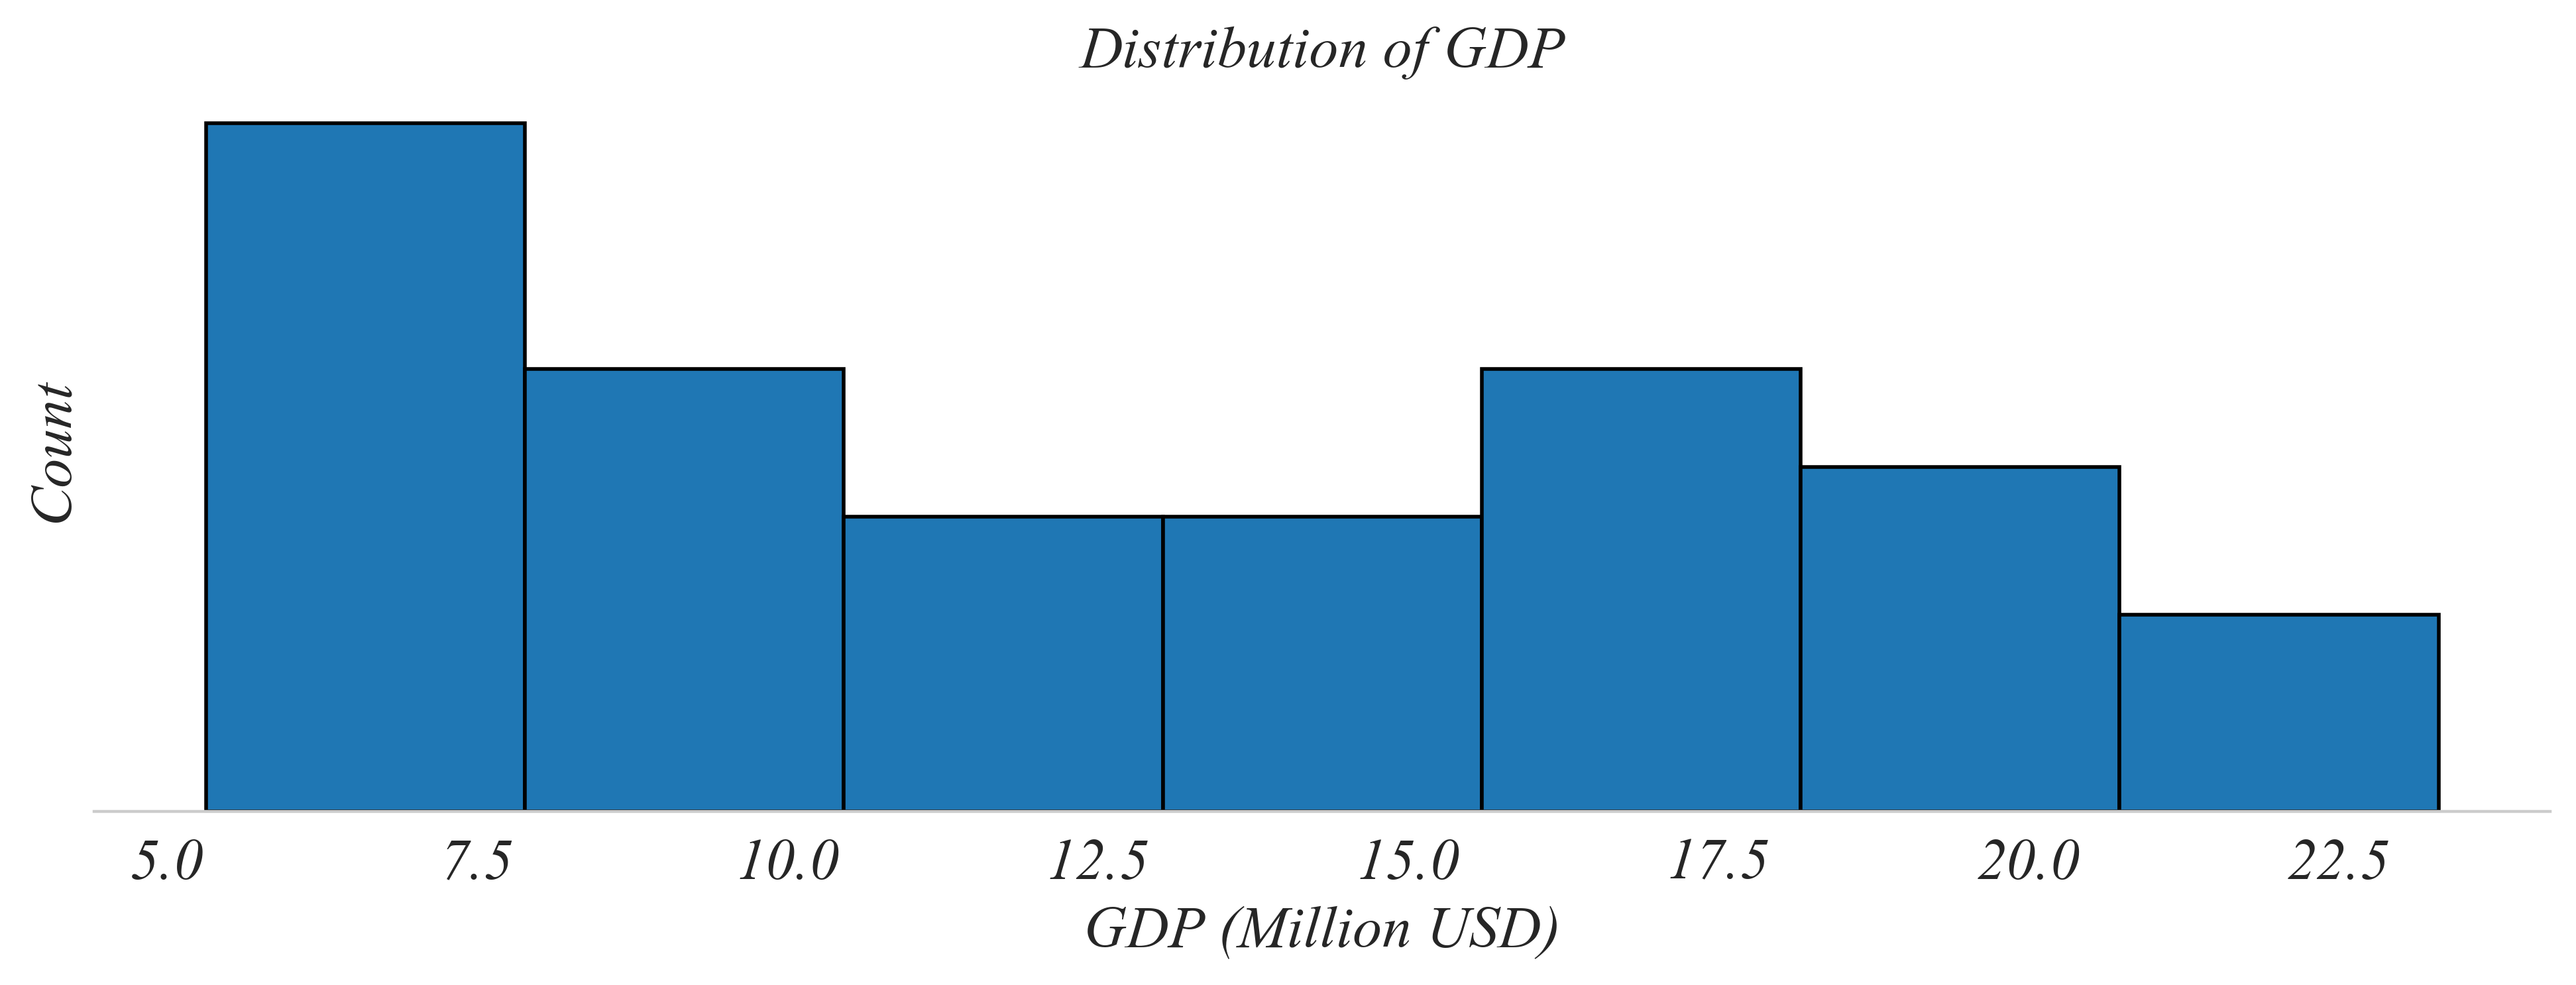

In [41]:
# Load Dataset
time_series = pd.read_csv('data/us_real_gdp.csv')

# Figure
plt.figure(figsize=(10, 4))
sns.histplot(data=time_series, x='Real_GDP', edgecolor='black', stat='count', alpha=1)

# Styling
plt.title("Distribution of GDP")
plt.xlabel("GDP (Million USD)")
plt.ylabel("Count")

plt.yticks([])
sns.despine(left=True, right=True, top=True)
plt.grid(False)
plt.tight_layout()

# Save
plt.savefig('i/i_01.png')

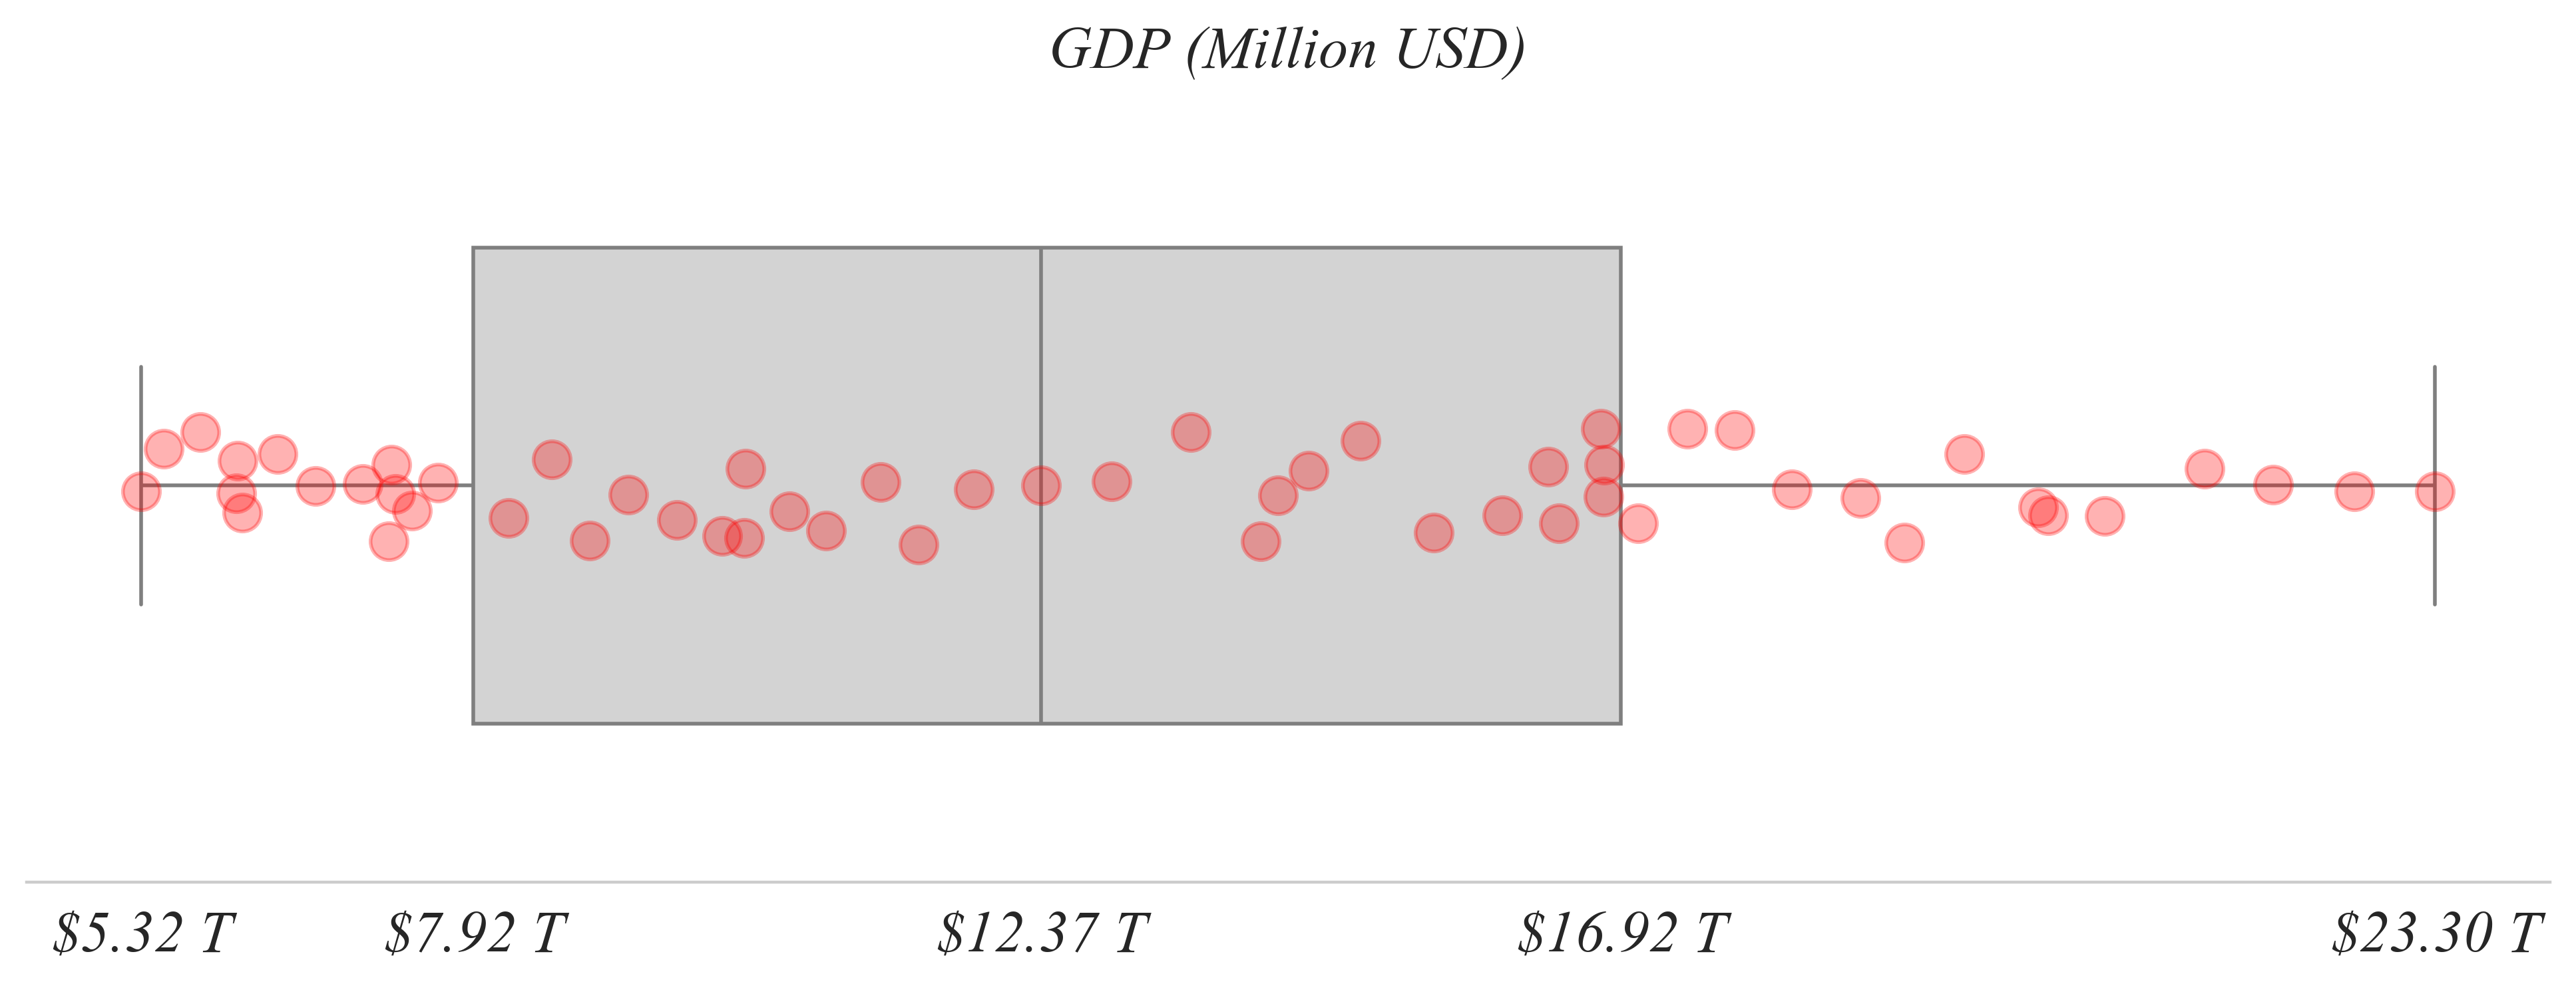

In [44]:
# Load Dataset
time_series = pd.read_csv('data/us_real_gdp.csv')

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(x=time_series['Real_GDP'], color='lightgrey', whis=(0, 100))
sns.stripplot(x=time_series['Real_GDP'], color='red', size=10, alpha=0.3, 
              edgecolor='red', linewidth=1)

# Annotations
quartiles = list(time_series['Real_GDP'].quantile([0, 0.25, 0.50, 0.75, 1]))
plt.xticks(quartiles, [f'${x:,.2f} T' for x in quartiles])
plt.tick_params(axis='x', width=1, length=4, color='black')

# Styling
plt.title("GDP (Million USD)")
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

plt.ylim([-2/3,2/3])
sns.despine(left=True, right=True, top=True)
plt.grid(False)
plt.tight_layout()

# Save
plt.savefig('i/i_02.png')

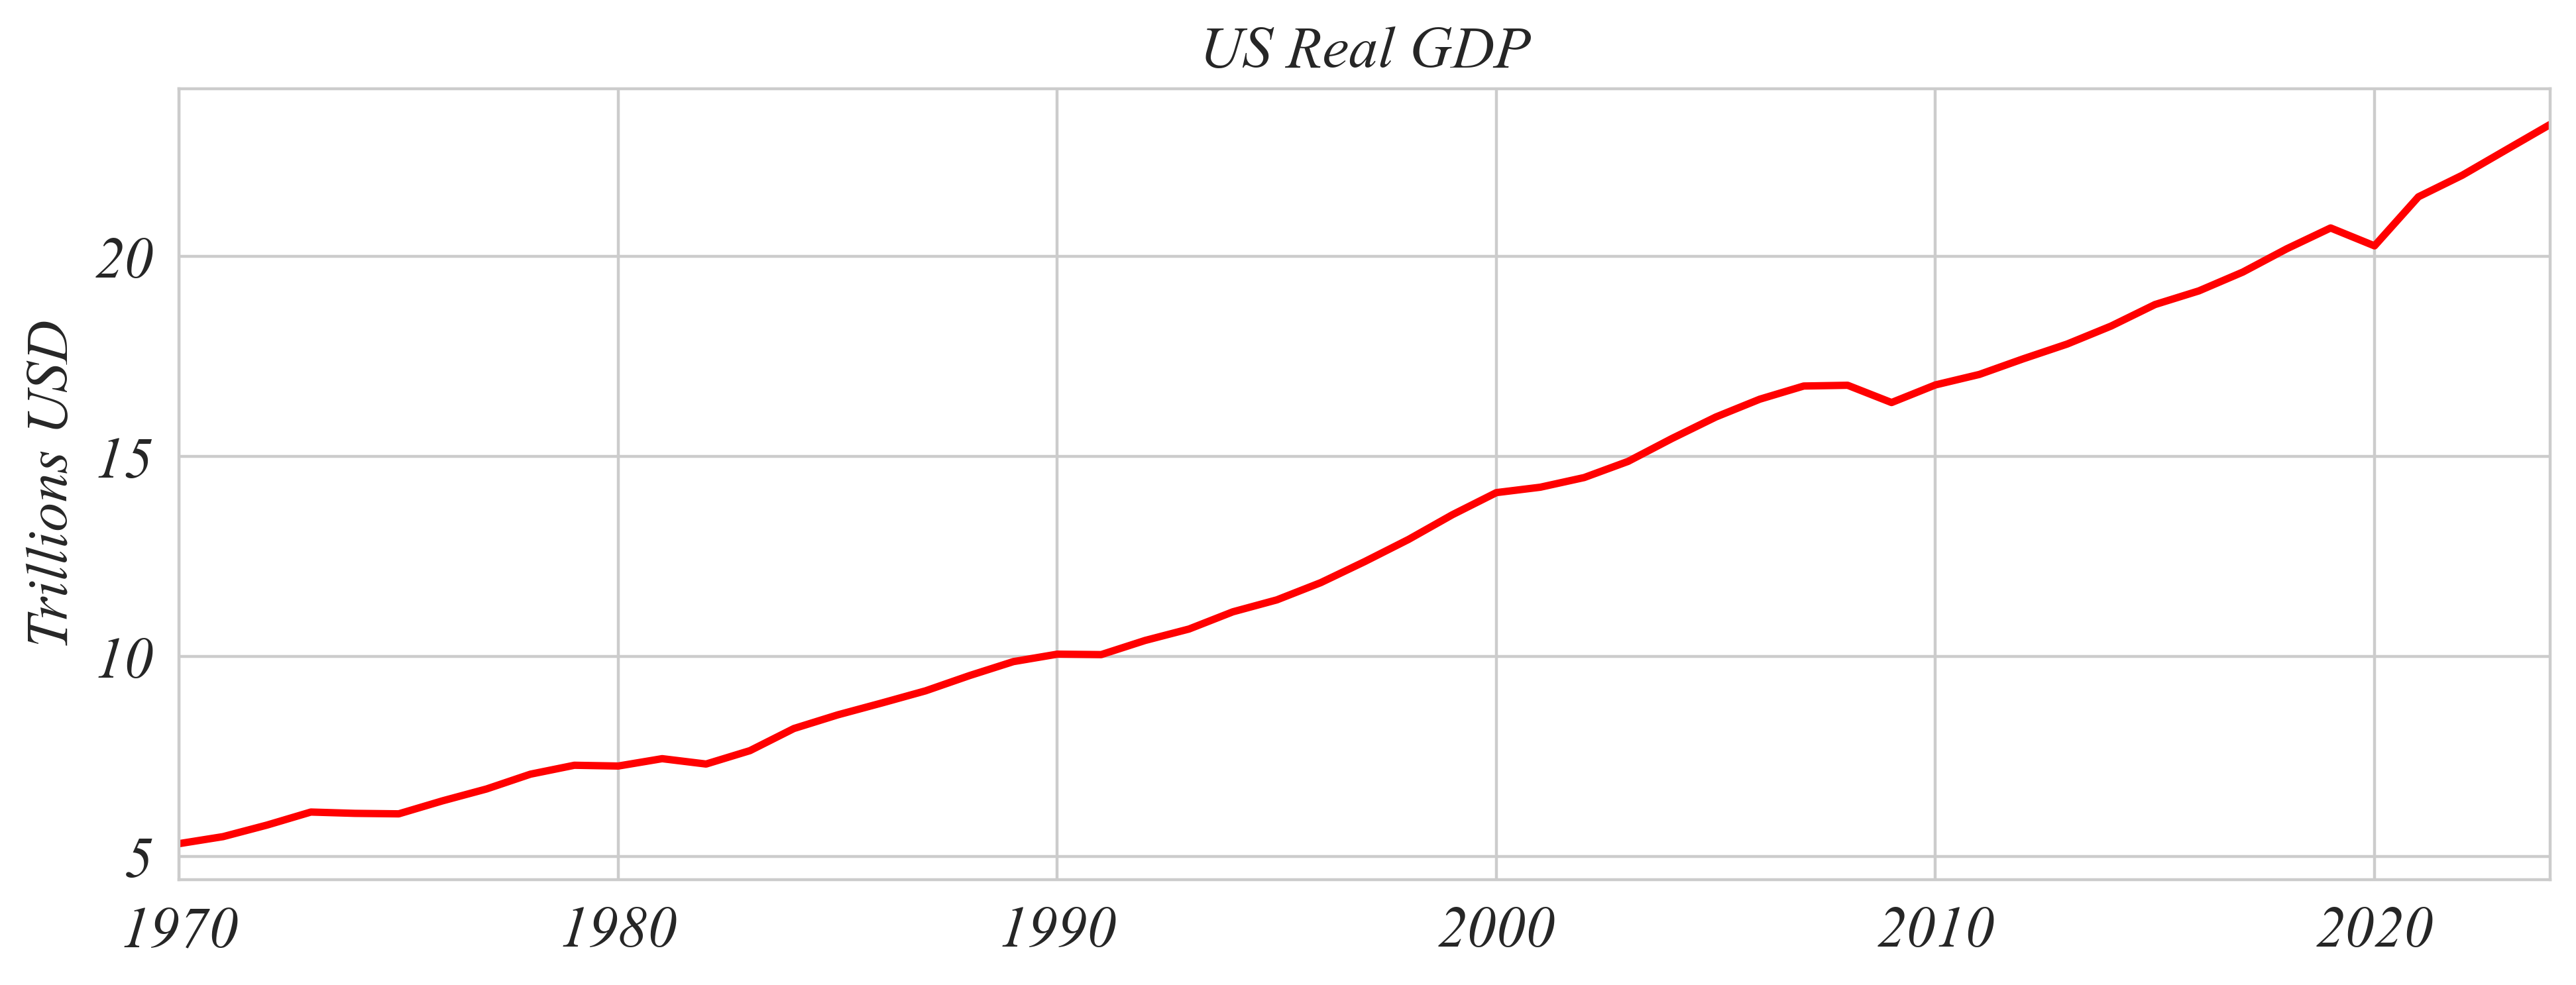

In [53]:
# Load Dataset
time_series = pd.read_csv('data/us_real_gdp.csv')

# Figure
plt.figure(figsize=(10, 4))
sns.lineplot(x=time_series['Year'], y=time_series['Real_GDP'], color='red', linewidth=2)

# Styling
plt.title('US Real GDP')
plt.xlabel('')
plt.xlim(time_series['Year'].min(), time_series['Year'].max())
plt.ylabel('Trillions USD')
plt.grid(True)
plt.tight_layout()

# Save
plt.savefig('i/i_03.png')

## Dataset 2: Cross Sectional Data

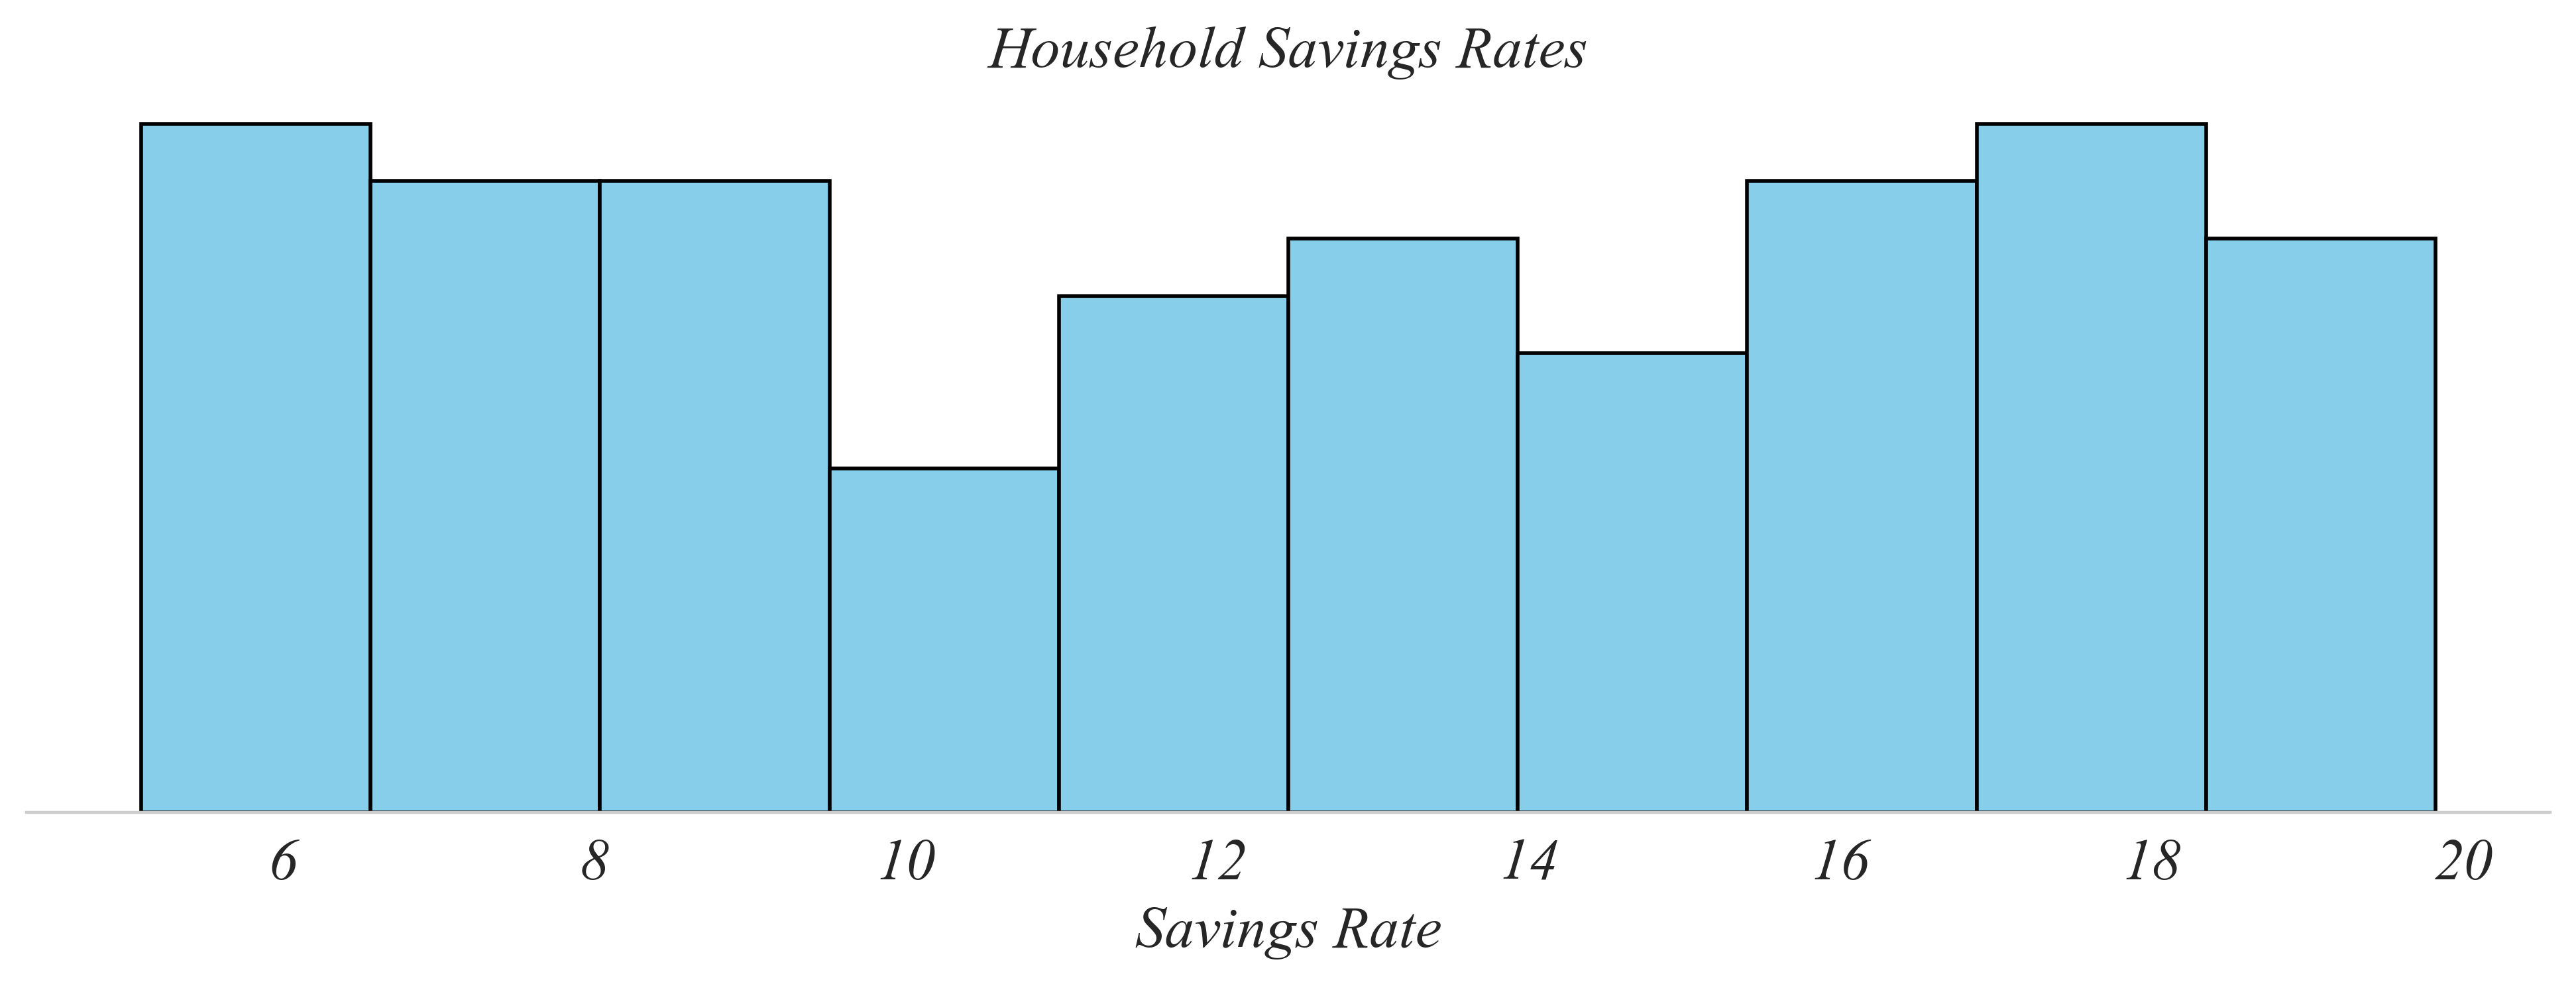

In [59]:
# Load Data
savings = pd.read_csv('data/household_savings.csv')

# Figure
plt.figure(figsize=(10, 4))
plt.hist(savings['Rate'], color='skyblue', edgecolor='black')
plt.xlabel('Savings Rate')
plt.title('Household Savings Rates')

plt.yticks([])
plt.grid(False)
sns.despine(left=True, right=True, top=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_04.png')

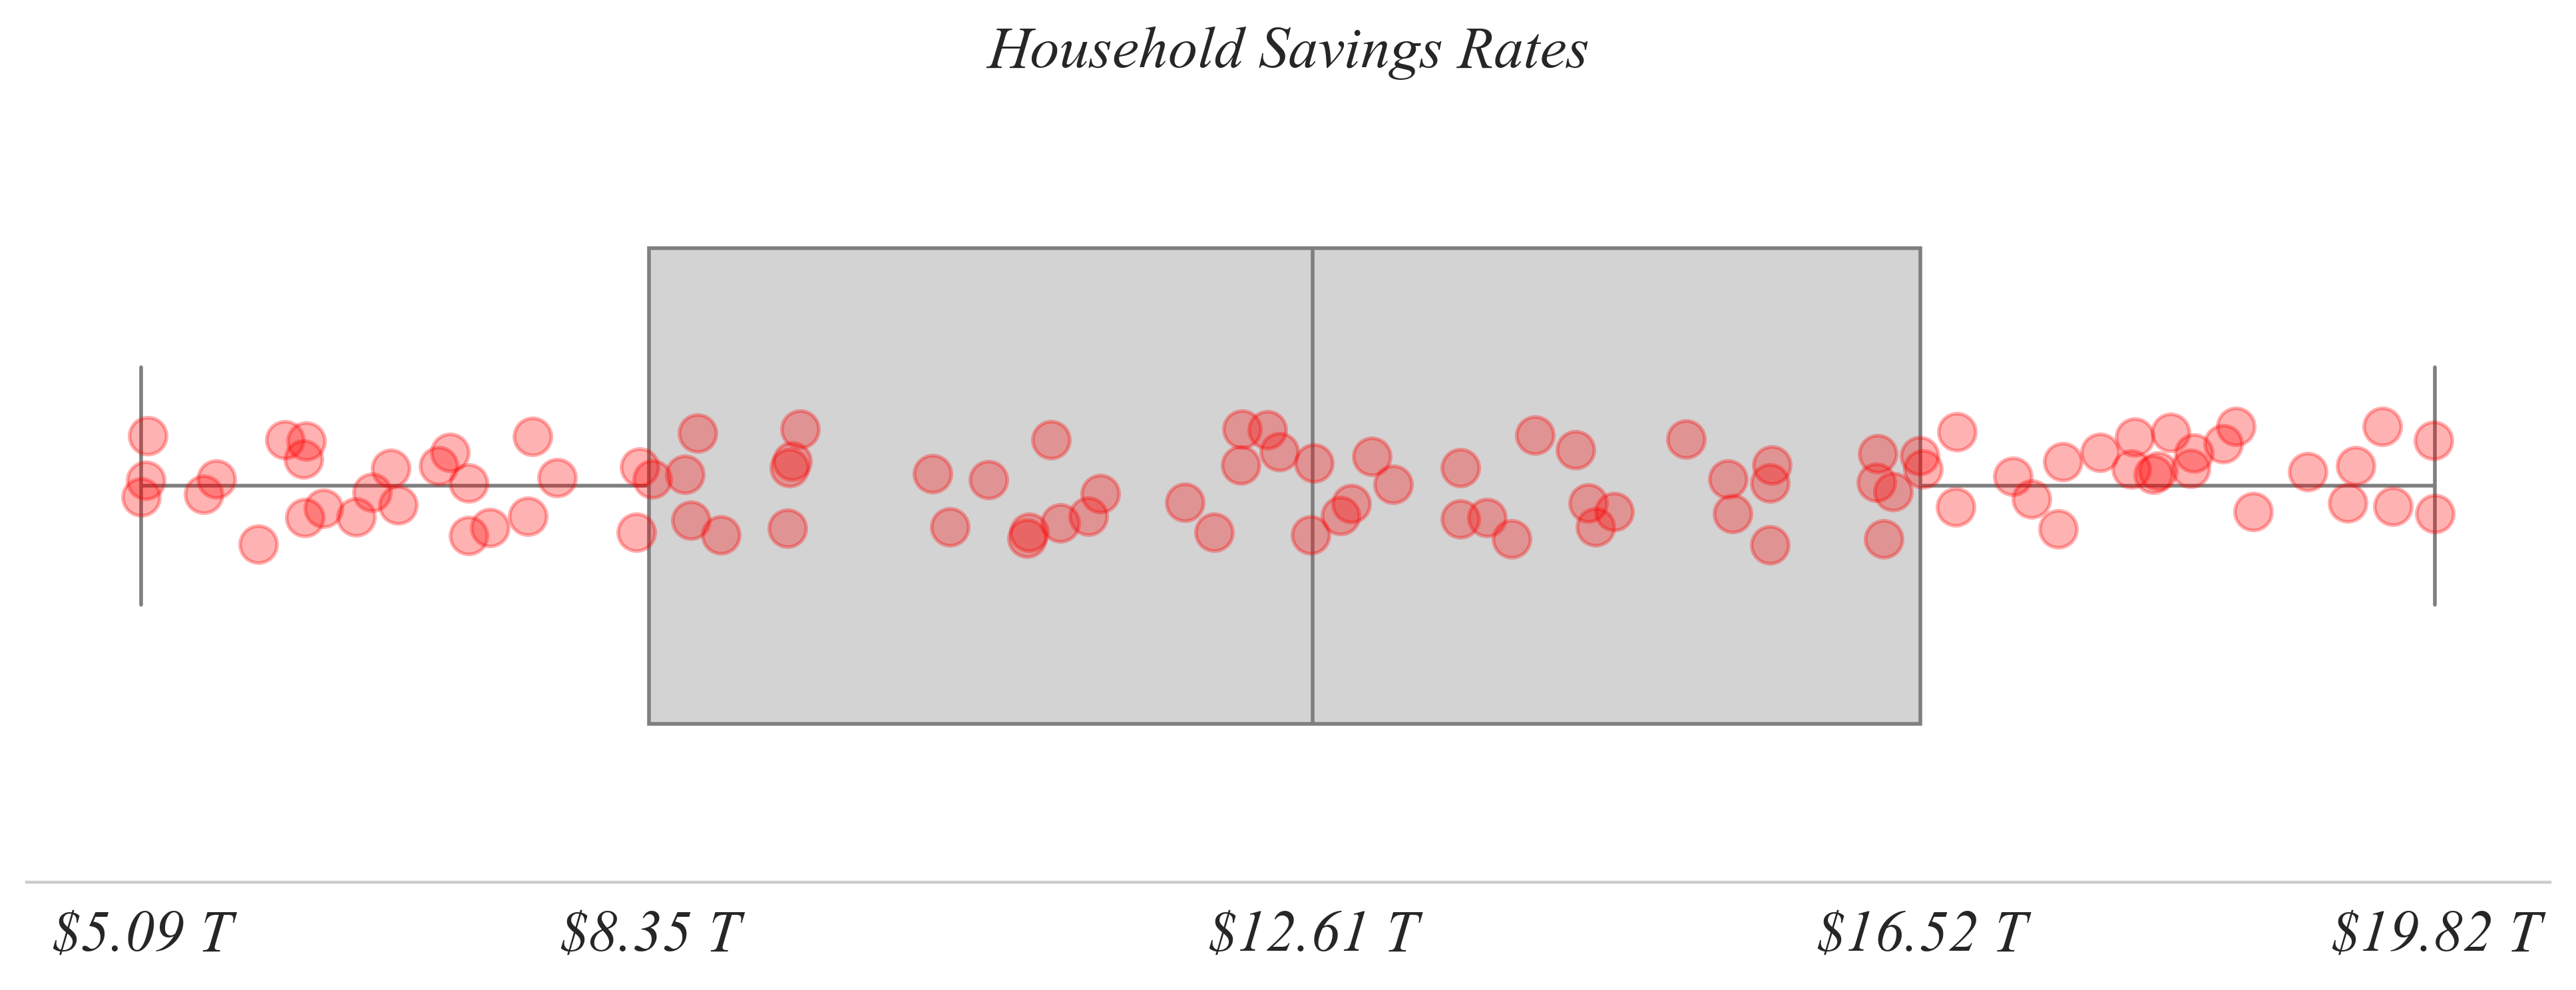

In [62]:
# Load Dataset
savings = pd.read_csv('data/household_savings.csv')

# Figure
plt.figure(figsize=(10, 4))
sns.boxplot(x=savings['Rate'], color='lightgrey', whis=(0, 100))
sns.stripplot(x=savings['Rate'], color='red', size=10, alpha=0.3, 
              edgecolor='red', linewidth=1)

# Annotations
quartiles = list(savings['Rate'].quantile([0, 0.25, 0.50, 0.75, 1]))
plt.xticks(quartiles, [f'${x:,.2f} T' for x in quartiles])
plt.tick_params(axis='x', width=1, length=4, color='black')

# Styling
plt.title('Household Savings Rates')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

plt.ylim([-2/3,2/3])
sns.despine(left=True, right=True, top=True)
plt.grid(False)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_05.png')

## Dataset 3: Panel Data

In [65]:
# Load Data
panel = pd.read_csv('data/household_incomes.csv')
panel.head()

,Household ID,Year,Income (USD)
0,H001,2010,34610.47
1,H001,2011,45559.97
2,H001,2012,83698.17
3,H001,2013,115593.13
4,H001,2014,47060.79


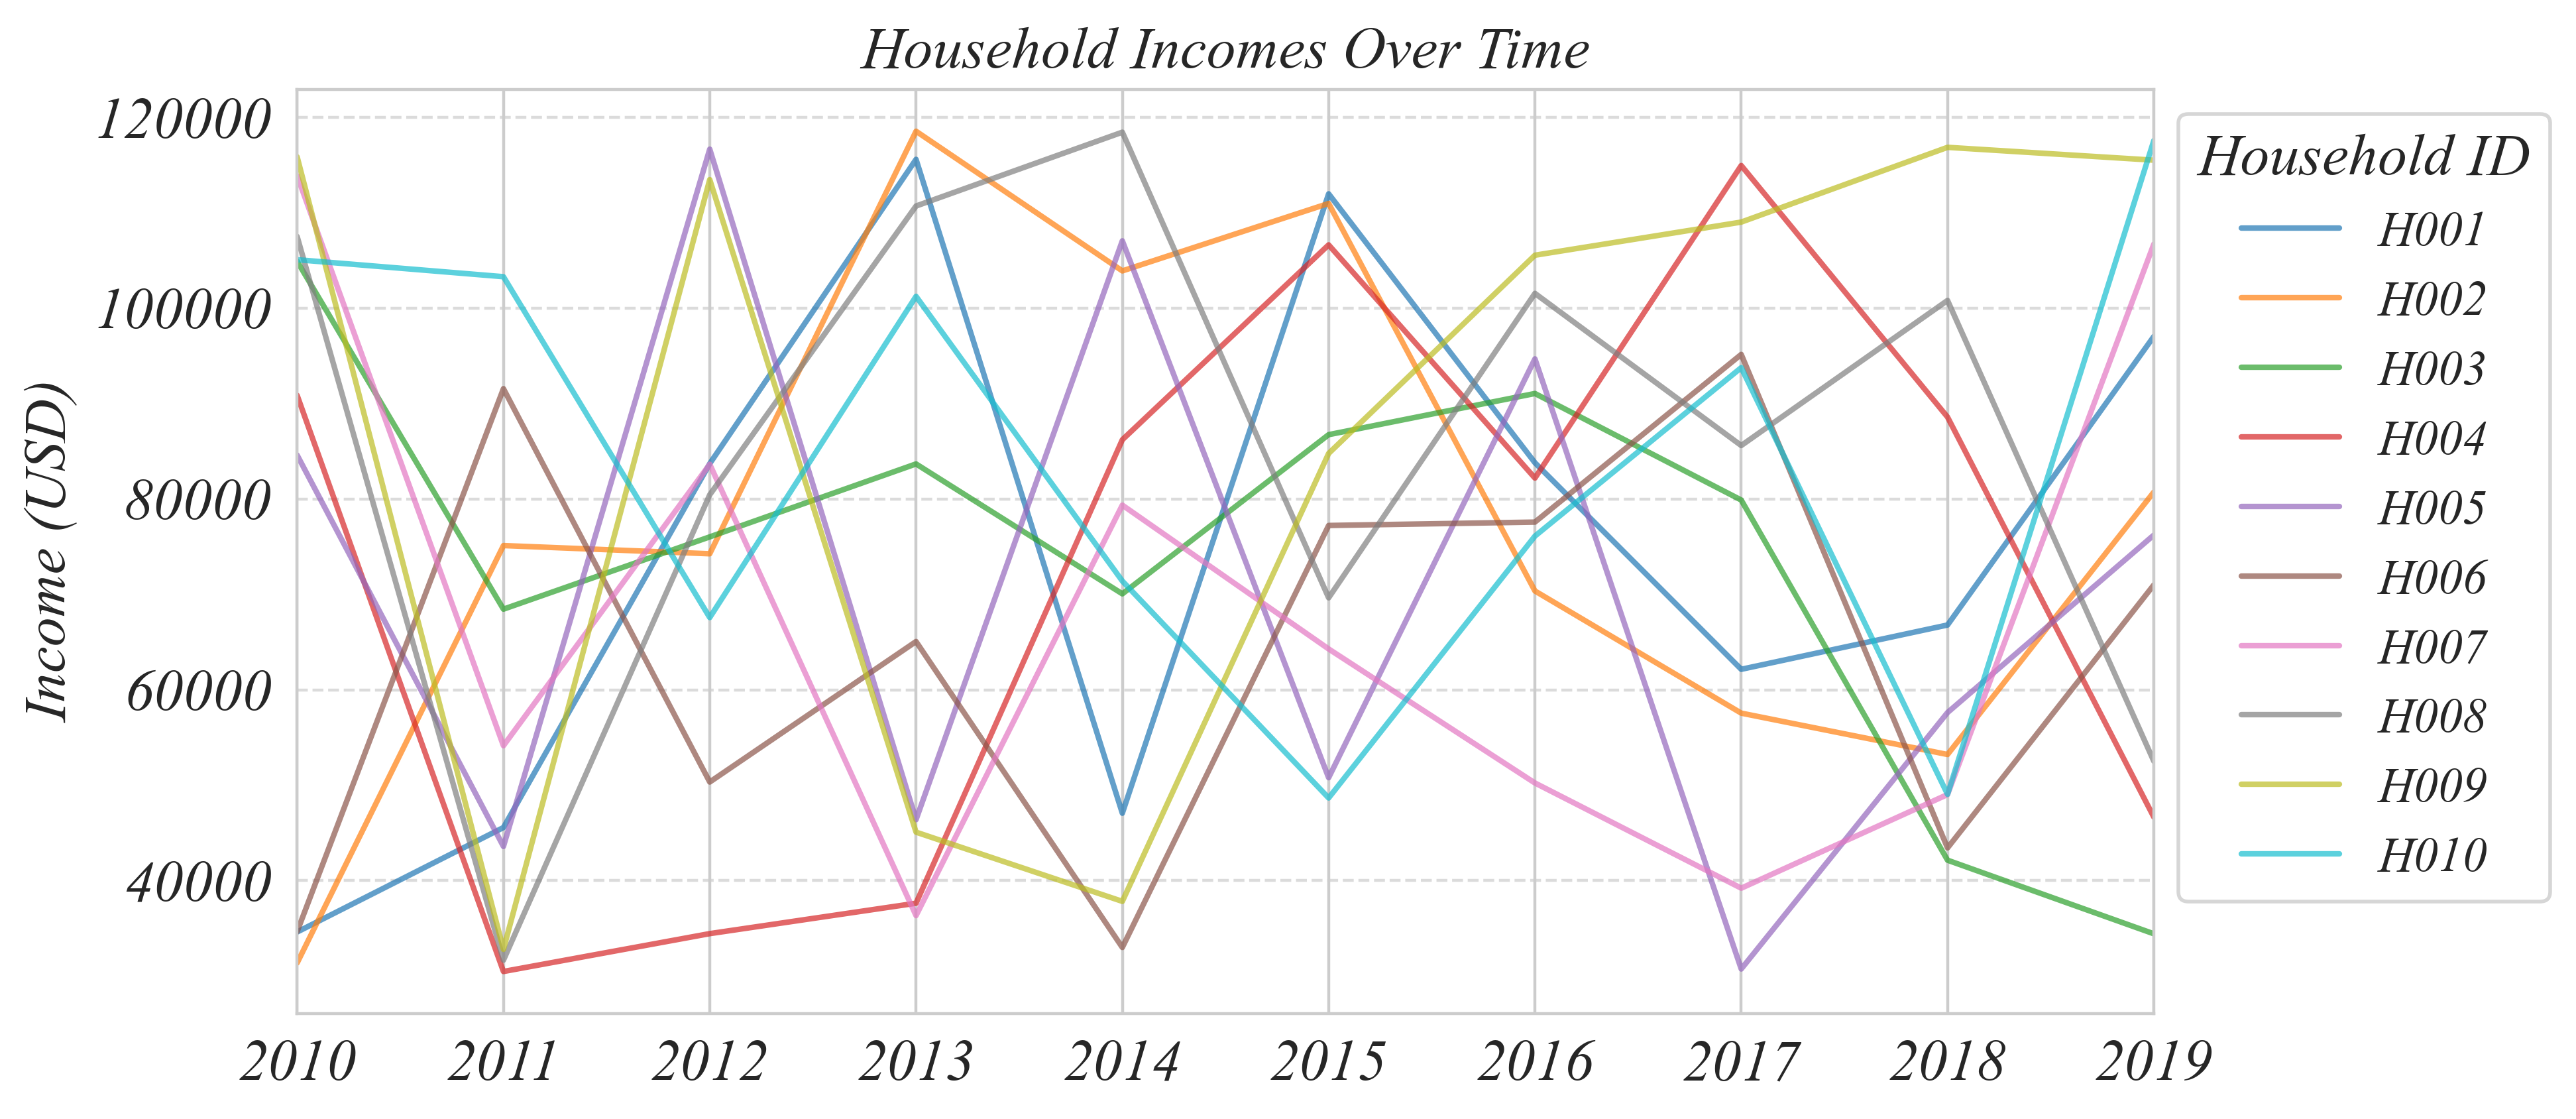

In [112]:
# Load Data
panel = pd.read_csv('data/household_incomes.csv')
panel_subset = panel[panel['Household ID'].isin(panel['Household ID'].unique()[:10])]

# Figure
plt.figure(figsize=(10, 4.5))
sns.lineplot(data=panel_subset, x='Year', y='Income (USD)', hue='Household ID', alpha=0.7)

# Styling
plt.title("Household Incomes Over Time")
plt.xlabel("")
plt.xlim(2010, 2019)
plt.ylabel("Income (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Household ID", fontsize='small')
plt.tight_layout()

# Save Figure
plt.savefig('i/i_06.png')

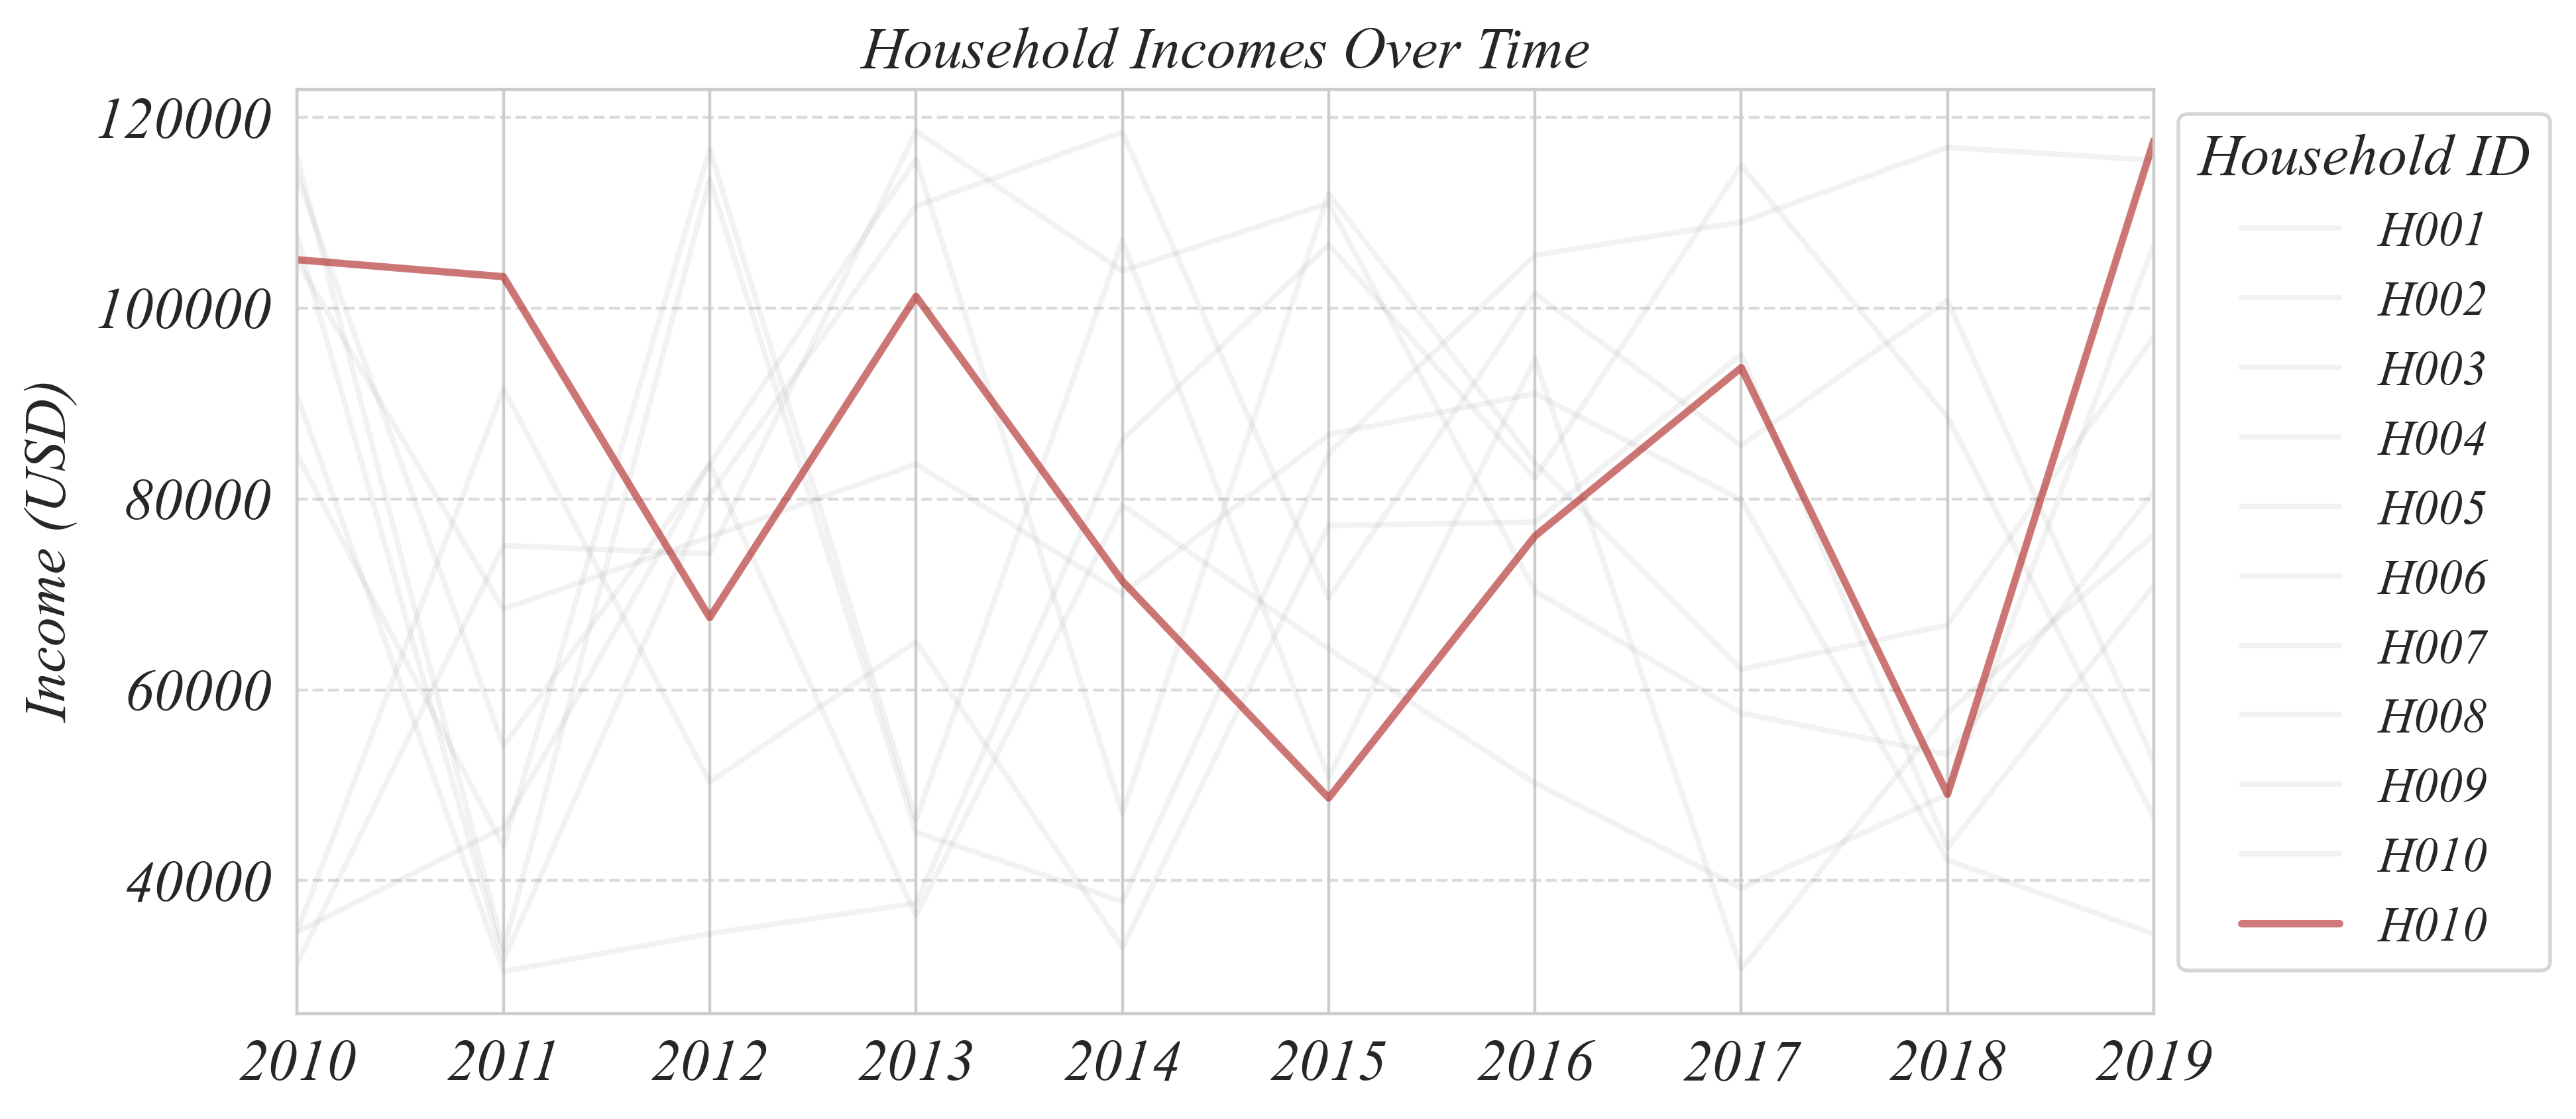

In [111]:
# Load Data
panel = pd.read_csv('data/household_incomes.csv')
panel_subset = panel[panel['Household ID'].isin(panel['Household ID'].unique()[:10])]
highlight_household = panel['Household ID'].unique()[9]
highlight_data = panel_subset[panel_subset['Household ID'] == highlight_household]

# Figure
plt.figure(figsize=(10, 4.5))
grey_palette = {household: 'grey' for household in panel_subset['Household ID'].unique()}
sns.lineplot(data=panel_subset, x='Year', y='Income (USD)', hue='Household ID', alpha=0.1, palette=grey_palette)
sns.lineplot(data=highlight_data, x='Year', y='Income (USD)', color='firebrick', alpha=0.6, linewidth=2, label=highlight_household)

# Styling
plt.title("Household Incomes Over Time")
plt.xlabel("")
plt.xlim(2010, 2019)
plt.ylabel("Income (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Household ID", fontsize='small')
plt.tight_layout()

# Save Figure
plt.savefig('i/i_07.png')

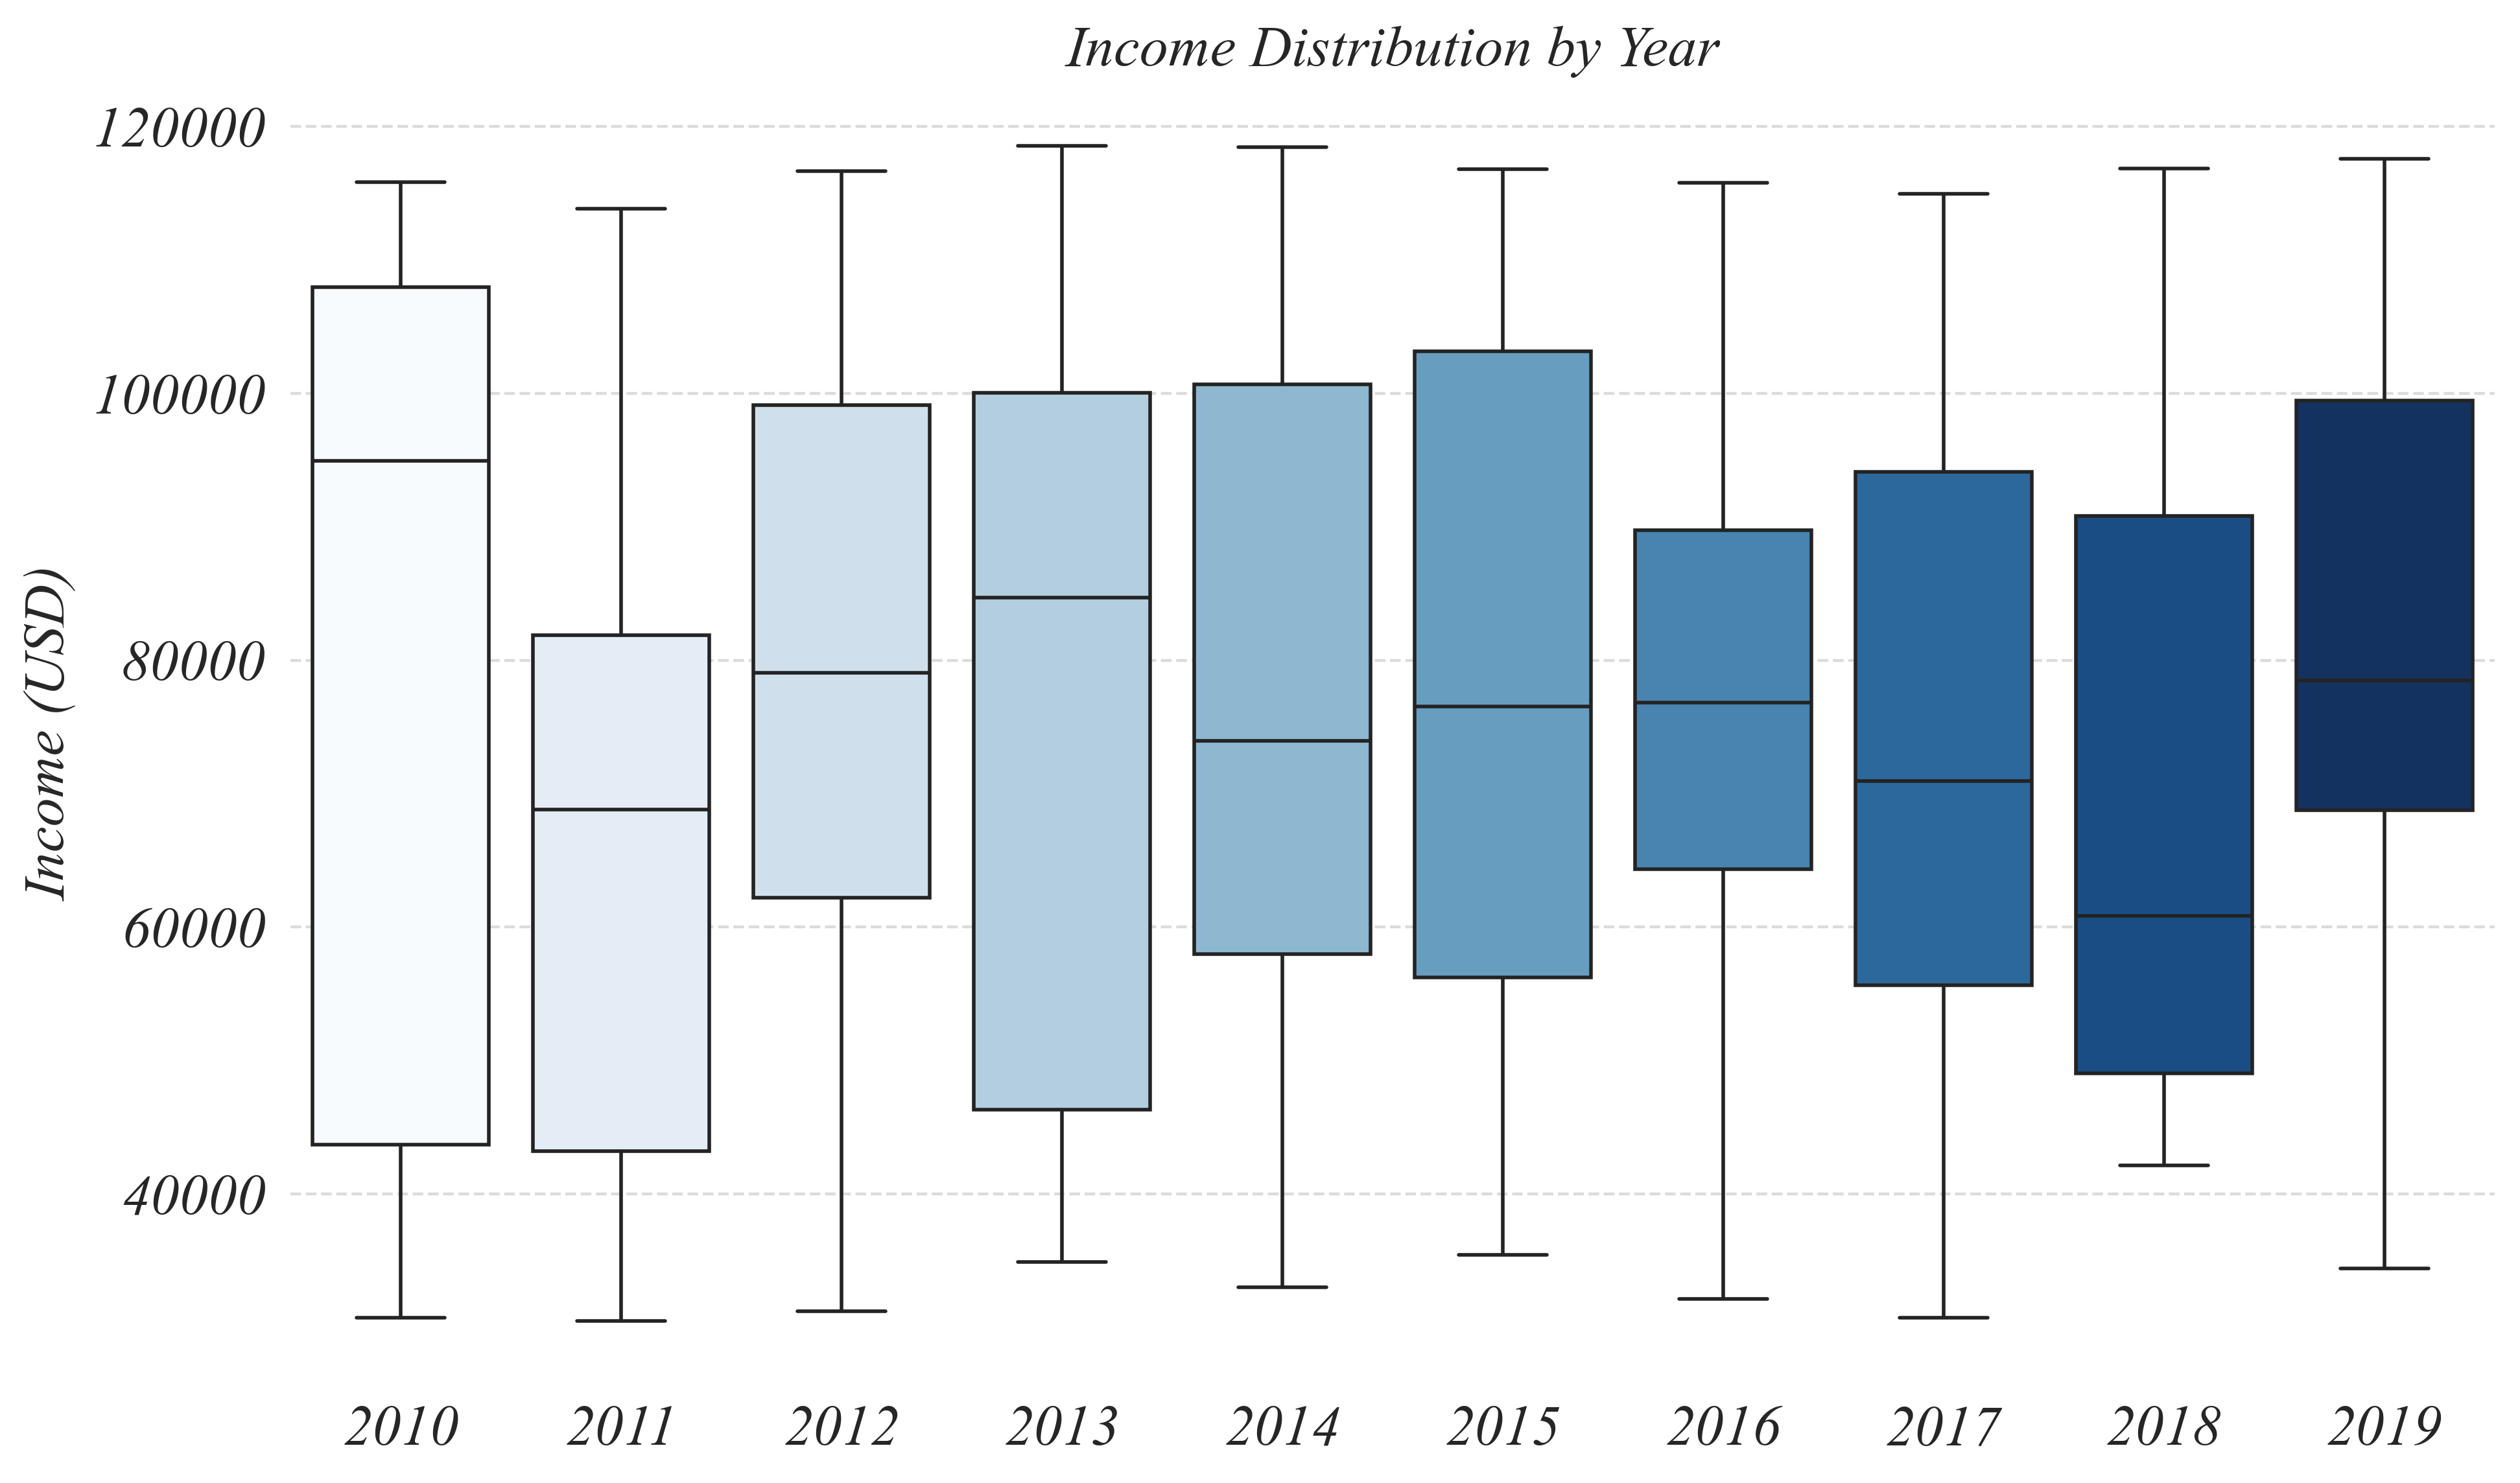

In [100]:
# Load Data
panel = pd.read_csv('data/household_incomes.csv')

# Figure
plt.figure(figsize=(10, 6))
sns.boxplot(data=panel, x='Year', y='Income (USD)', hue='Year', palette='Blues', legend=False)

# Styling
plt.title("Income Distribution by Year")
plt.xlabel("")
plt.ylabel("Income (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_08.png')

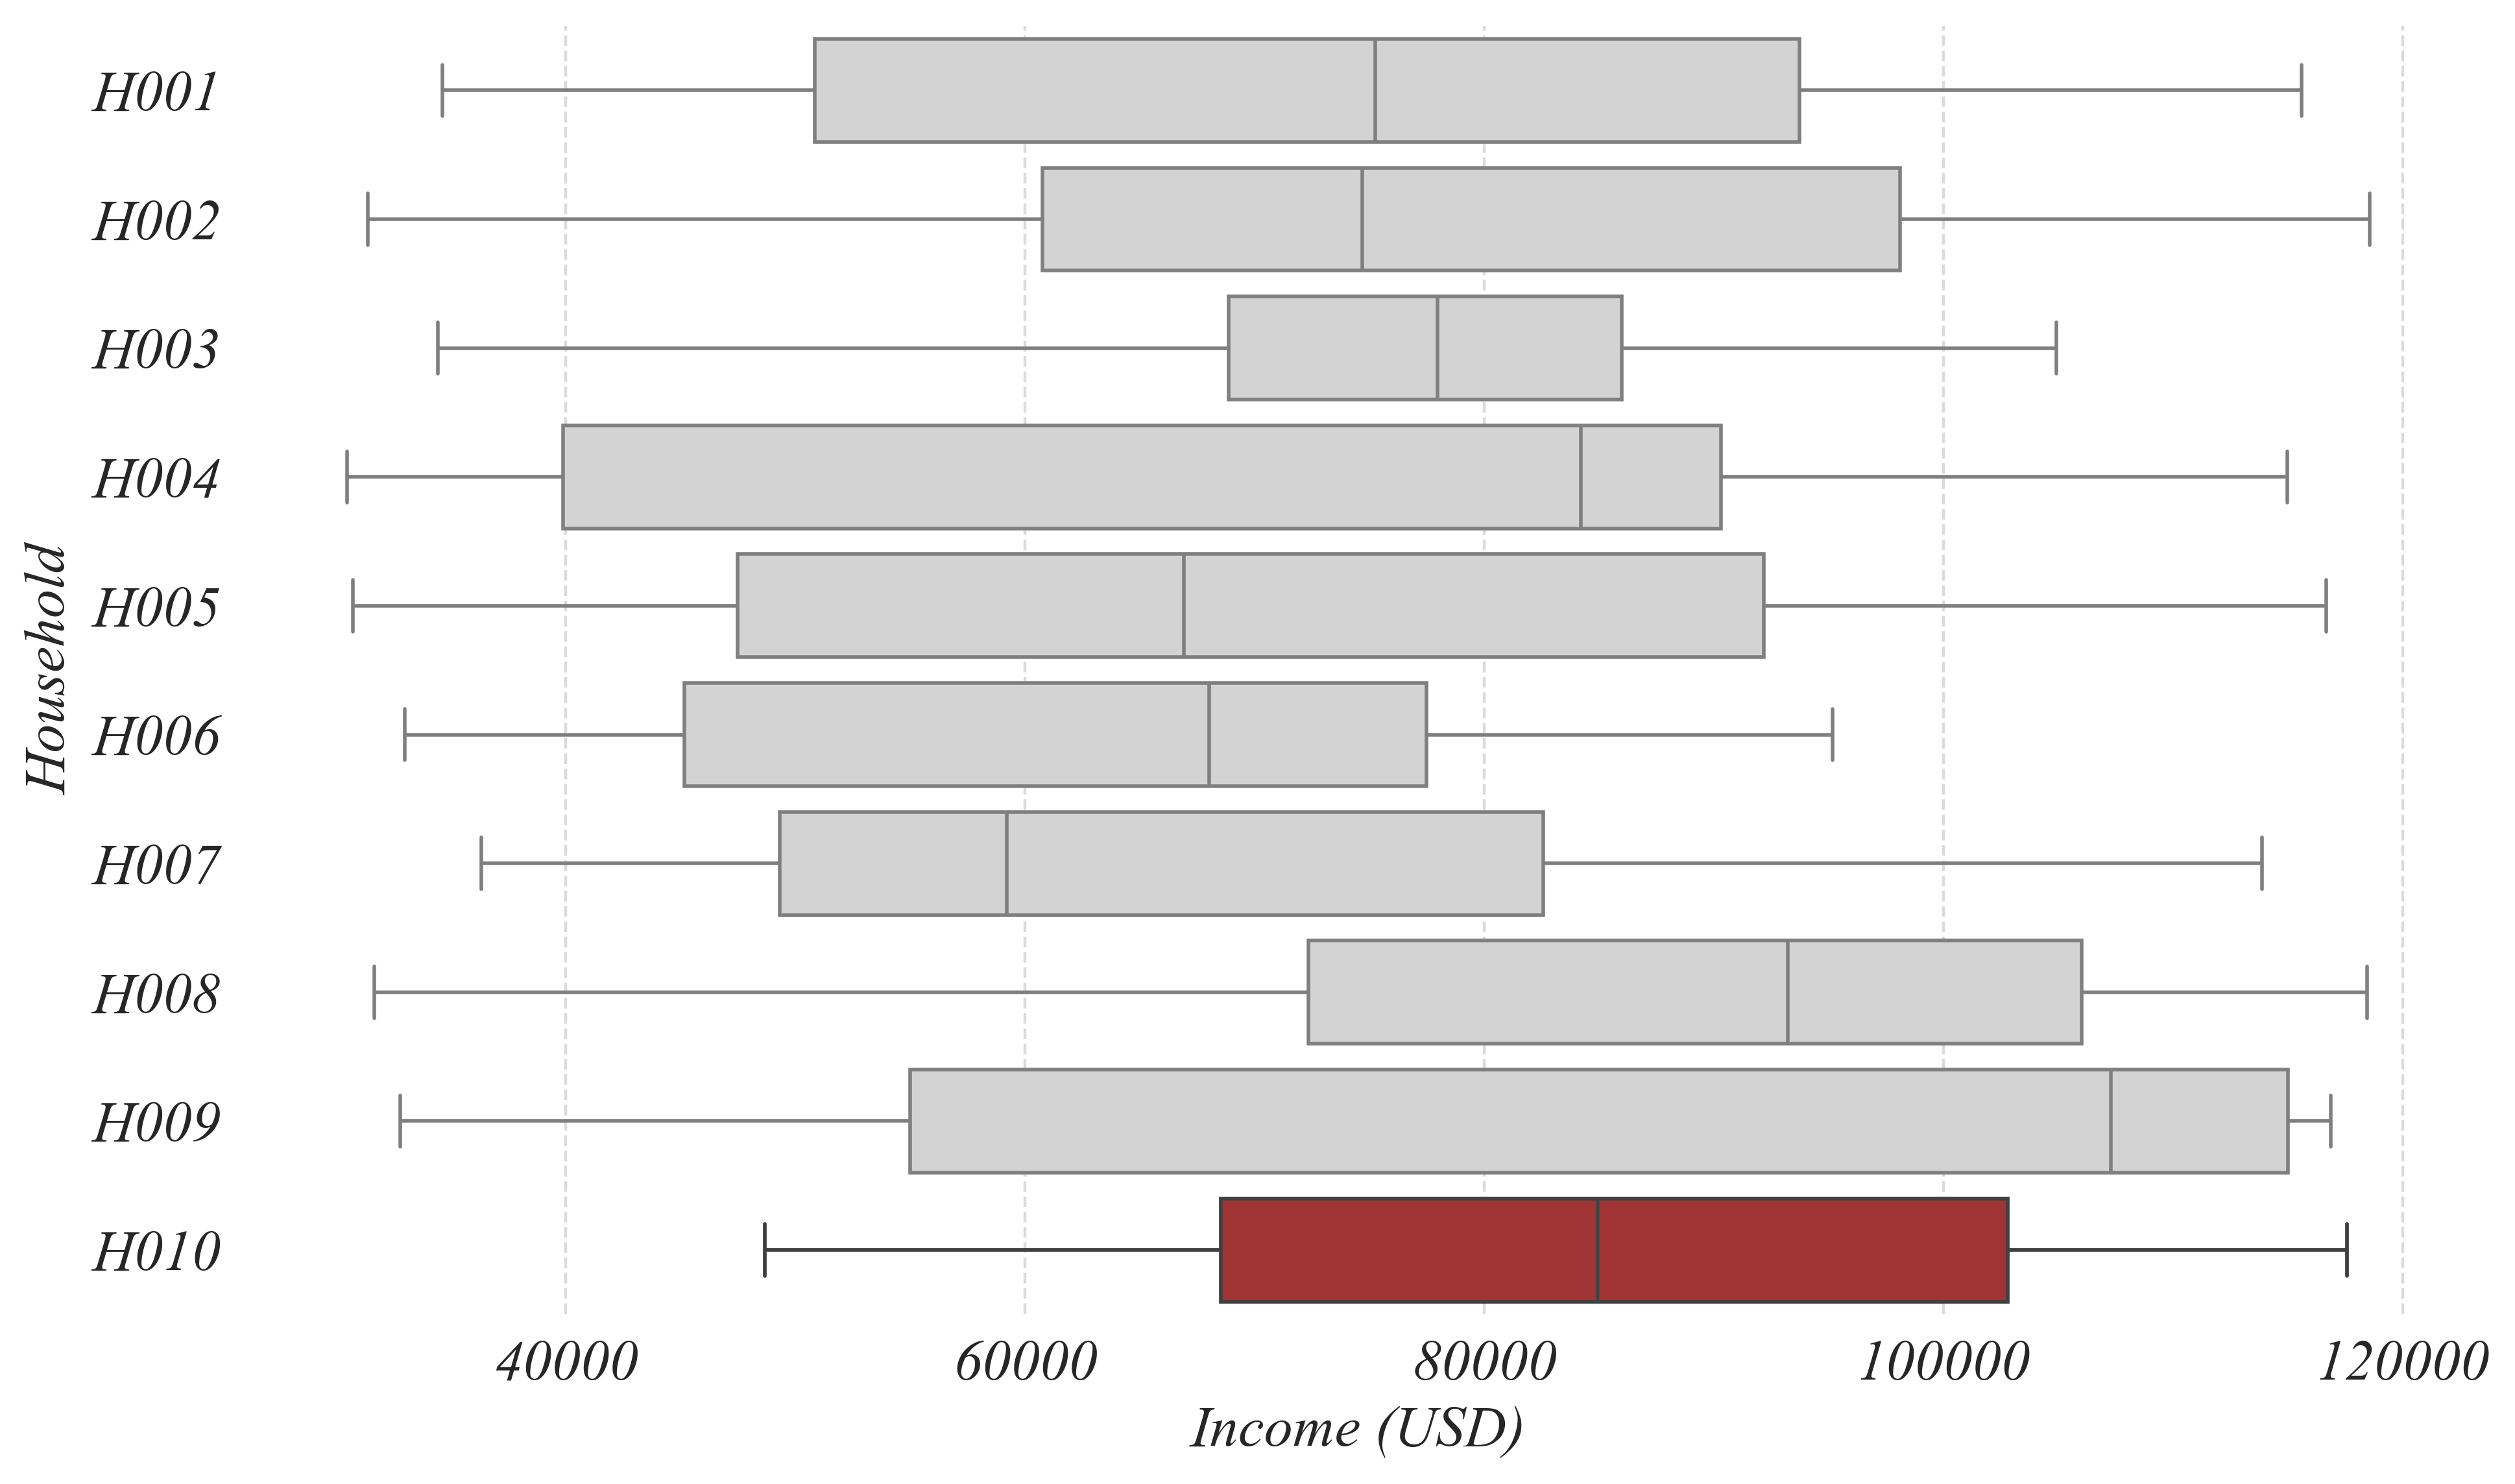

In [114]:
# Load Data
panel = pd.read_csv('data/household_incomes.csv')

# Figure
plt.figure(figsize=(10, 6))
sns.boxplot(data=panel[panel['Household ID'].isin(panel['Household ID'].unique()[:10])], y='Household ID', x='Income (USD)', color='lightgrey', whis=(0, 100))
sns.boxplot(data=panel[panel['Household ID'].isin(panel['Household ID'].unique()[9:10])], y='Household ID', x='Income (USD)', color='firebrick', whis=(0, 100))

# Styling
plt.ylabel("Household")
plt.xlabel("Income (USD)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(left=True, right=True, top=True, bottom=True)
plt.tight_layout()

# Save Figure
plt.savefig('i/i_09.png')